In [19]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Embedding

In [20]:
docs = ['go india',
		'india india',
		'hip hip hurray',
		'jeetega bhai jeetega india jeetega',
		'bharat mata ki jai',
		'kohli kohli',
		'sachin sachin',
		'dhoni dhoni',
		'modi ji ki jai',
		'inquilab zindabad']

In [21]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()

In [22]:
tokenizer.fit_on_texts(docs)

In [23]:
len(tokenizer.word_index)

17

In [24]:
sequences = tokenizer.texts_to_sequences(docs)
sequences

[[9, 1],
 [1, 1],
 [3, 3, 10],
 [2, 11, 2, 1, 2],
 [12, 13, 4, 5],
 [6, 6],
 [7, 7],
 [8, 8],
 [14, 15, 4, 5],
 [16, 17]]

In [25]:
from keras.utils import pad_sequences
sequences = pad_sequences(sequences, padding='post')
sequences

array([[ 9,  1,  0,  0,  0],
       [ 1,  1,  0,  0,  0],
       [ 3,  3, 10,  0,  0],
       [ 2, 11,  2,  1,  2],
       [12, 13,  4,  5,  0],
       [ 6,  6,  0,  0,  0],
       [ 7,  7,  0,  0,  0],
       [ 8,  8,  0,  0,  0],
       [14, 15,  4,  5,  0],
       [16, 17,  0,  0,  0]], dtype=int32)

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding

model = Sequential()
model.add(Embedding(input_dim=17, output_dim=2, input_length=5))

# Build the model by specifying the input shape
model.build(input_shape=(None, 5))

model.summary()


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_8 (Embedding)              │ (None, 5, 2)                │              34 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 34 (136.00 B)

 Trainable params: 34 (136.00 B)

 Non-trainable params: 0 (0.00 B)

In [32]:
model.compile('adam','accuracy')

In [33]:
pred = model.predict(sequences)
print(pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step
[[[ 0.03569788 -0.03689952]
  [-0.01040274  0.0045798 ]
  [-0.01851512 -0.01783174]
  [-0.01851512 -0.01783174]
  [-0.01851512 -0.01783174]]

 [[-0.01040274  0.0045798 ]
  [-0.01040274  0.0045798 ]
  [-0.01851512 -0.01783174]
  [-0.01851512 -0.01783174]
  [-0.01851512 -0.01783174]]

 [[ 0.03801997  0.01191384]
  [ 0.03801997  0.01191384]
  [ 0.03084354  0.03874693]
  [-0.01851512 -0.01783174]
  [-0.01851512 -0.01783174]]

 [[-0.02789691  0.02845342]
  [-0.04465059 -0.03080137]
  [-0.02789691  0.02845342]
  [-0.01040274  0.0045798 ]
  [-0.02789691  0.02845342]]

 [[-0.0236707  -0.03003067]
  [-0.00667693  0.00683668]
  [-0.01598782  0.03084124]
  [ 0.04991453  0.01562443]
  [-0.01851512 -0.01783174]]

 [[ 0.03825665  0.00295129]
  [ 0.03825665  0.00295129]
  [-0.01851512 -0.01783174]
  [-0.01851512 -0.01783174]
  [-0.01851512 -0.01783174]]

 [[-0.03557716 -0.02110999]
  [-0.03557716 -0.02110999]
  [-0.01851512 -0.01783174]
  [-0.01851512 -0.0178317

In [36]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Embedding,SimpleRNN,Flatten
from keras.utils import pad_sequences
from keras.datasets import imdb
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()

In [37]:
(X_train,y_train),(X_test,y_test)=imdb.load_data()

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [39]:
X_train = pad_sequences(X_train,padding='post',maxlen=50)
X_test = pad_sequences(X_test,padding='post',maxlen=50)

In [40]:
X_train.shape

(25000, 50)

In [48]:
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=2, input_length=50))
model.add(SimpleRNN(32,return_sequences=False))
model.add(Dense(1,activation='sigmoid'))

model.build(input_shape=(None,50))
model.summary()

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_15 (Embedding)             │ (None, 50, 2)               │          20,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_5 (SimpleRNN)             │ (None, 32)                  │           1,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,153 (82.63 KB)

 Trainable params: 21,153 (82.63 KB)

 Non-trainable params: 0 (0.00 B)

In [49]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train,epochs=5,validation_data=(X_test,y_test))

Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 16s 13ms/step - acc: 0.5402 - loss: 0.6726 - val_acc: 0.7982 - val_loss: 0.4355
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - acc: 0.8230 - loss: 0.4081 - val_acc: 0.8072 - val_loss: 0.4294
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - acc: 0.8605 - loss: 0.3390 - val_acc: 0.8033 - val_loss: 0.4498
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - acc: 0.8808 - loss: 0.2944 - val_acc: 0.8009 - val_loss: 0.4551
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - acc: 0.8939 - loss: 0.2758 - val_acc: 0.7944 - val_loss: 0.4893


In [50]:
import matplotlib.pyplot as plt

In [51]:
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

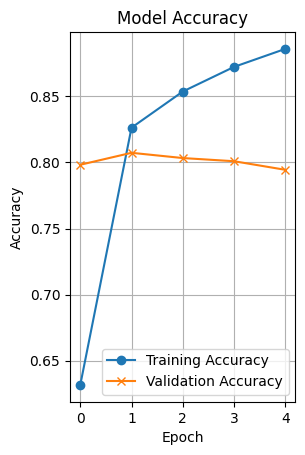

In [52]:
plt.subplot(1, 2, 1)
plt.plot(history.history['acc'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_acc'], label='Validation Accuracy', marker='x')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

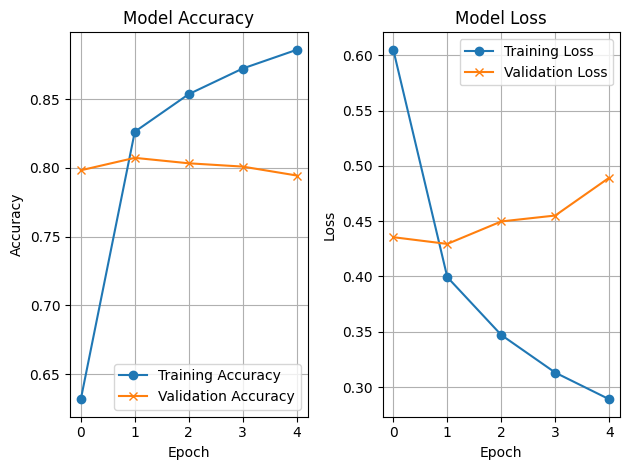

In [56]:
plt.subplot(1, 2, 1)
plt.plot(history.history['acc'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_acc'], label='Validation Accuracy', marker='x')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='x')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [55]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>